In [2]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df_weather = pd.read_csv('../dataset/processed/crop_weather_data.csv')

# Display the first 5 rows
df_weather.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day,Temperature_int
0,2014-01-01,Wheat,9.440599,80.000000,10.956707,37.095684,2014,1,1,9
1,2014-01-01,Corn,20.052576,79.947424,8.591577,104.871310,2014,1,1,20
2,2014-01-01,Rice,12.143099,80.000000,7.227751,40.782177,2014,1,1,12
3,2014-01-01,Barley,19.751848,80.000000,2.682683,58.939796,2014,1,1,20
4,2014-01-01,Soybean,16.110395,80.000000,7.696070,32.970413,2014,1,1,16


In [4]:
print(df_weather.isnull().sum())

Date               0
Crop_Type          0
Temperature        0
Humidity           0
Wind_Speed         0
Crop_Yield         0
Year               0
Month              0
Day                0
Temperature_int    0
dtype: int64


In [5]:
#Print data info (data types, non-null counts, memory usage)
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             36520 non-null  object 
 1   Crop_Type        36520 non-null  object 
 2   Temperature      36520 non-null  float64
 3   Humidity         36520 non-null  float64
 4   Wind_Speed       36520 non-null  float64
 5   Crop_Yield       36520 non-null  float64
 6   Year             36520 non-null  int64  
 7   Month            36520 non-null  int64  
 8   Day              36520 non-null  int64  
 9   Temperature_int  36520 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB
None


In [7]:
# Round Temperature, Humidity, and Wind_Speed to nearest integer
df_weather['Temperature_int'] = df_weather['Temperature'].round().astype(int)
df_weather['Humidity_int'] = df_weather['Humidity'].round().astype(int)
df_weather['Wind_Speed_int'] = df_weather['Wind_Speed'].round().astype(int)

print(df_weather[['Temperature', 'Temperature_int',
                  'Humidity', 'Humidity_int',
                  'Wind_Speed', 'Wind_Speed_int']].head())

   Temperature  Temperature_int   Humidity  Humidity_int  Wind_Speed  \
0     9.440599                9  80.000000            80   10.956707   
1    20.052576               20  79.947424            80    8.591577   
2    12.143099               12  80.000000            80    7.227751   
3    19.751848               20  80.000000            80    2.682683   
4    16.110395               16  80.000000            80    7.696070   

   Wind_Speed_int  
0              11  
1               9  
2               7  
3               3  
4               8  


In [8]:
# Round Temperature, Humidity, and Wind_Speed to nearest integer
# Overwrite the existing columns instead of creating new ones
df_weather['Temperature'] = df_weather['Temperature'].round().astype(int)
df_weather['Humidity']    = df_weather['Humidity'].round().astype(int)
df_weather['Wind_Speed']  = df_weather['Wind_Speed'].round().astype(int)

# Print to verify the changes
print(df_weather[['Temperature', 'Humidity', 'Wind_Speed']].head())

   Temperature  Humidity  Wind_Speed
0            9        80          11
1           20        80           9
2           12        80           7
3           20        80           3
4           16        80           8


In [9]:
# Remove integer-converted columns (Temperature_int, Humidity_int, Wind_Speed_int)
df_weather = df_weather.drop(columns=['Temperature_int', 'Humidity_int', 'Wind_Speed_int'])

# Verify columns are removed
print(df_weather.head())

         Date Crop_Type  Temperature  Humidity  Wind_Speed  Crop_Yield  Year  \
0  2014-01-01     Wheat            9        80          11   37.095684  2014   
1  2014-01-01      Corn           20        80           9  104.871310  2014   
2  2014-01-01      Rice           12        80           7   40.782177  2014   
3  2014-01-01    Barley           20        80           3   58.939796  2014   
4  2014-01-01   Soybean           16        80           8   32.970413  2014   

   Month  Day  
0      1    1  
1      1    1  
2      1    1  
3      1    1  
4      1    1  


In [10]:
# Display the first 5 rows
df_weather.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,9,80,11,37.095684,2014,1,1
1,2014-01-01,Corn,20,80,9,104.871310,2014,1,1
2,2014-01-01,Rice,12,80,7,40.782177,2014,1,1
3,2014-01-01,Barley,20,80,3,58.939796,2014,1,1
4,2014-01-01,Soybean,16,80,8,32.970413,2014,1,1


In [11]:
#Display summary statistics for numerical columns
print(df_weather.describe())

        Temperature      Humidity    Wind_Speed    Crop_Yield          Year  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean      23.811528     74.259502     10.021440     38.506600   2018.499726   
std        8.926331      6.772669      3.010711     18.773084      2.871939   
min       -4.000000     46.000000     -3.000000      0.001761   2014.000000   
25%       17.000000     70.000000      8.000000     28.737454   2016.000000   
50%       23.000000     77.000000     10.000000     37.774184   2018.500000   
75%       30.000000     80.000000     12.000000     46.415729   2021.000000   
max       54.000000     80.000000     23.000000    136.711982   2023.000000   

              Month           Day  
count  36520.000000  36520.000000  
mean       6.523549     15.727820  
std        3.448580      8.799445  
min        1.000000      1.000000  
25%        4.000000      8.000000  
50%        7.000000     16.000000  
75%       10.000000     23.000000  


In [17]:
df_weather.columns

Index(['Date', 'Crop_Type', 'Temperature', 'Humidity', 'Wind_Speed',
       'Crop_Yield', 'Year', 'Month', 'Day'],
      dtype='object')

In [18]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df_weather.columns:
    duplicated_count = df_weather[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)

Column: Date
Duplicate Count: 32868
**************************************************
Column: Crop_Type
Duplicate Count: 36510
**************************************************
Column: Temperature
Duplicate Count: 36462
**************************************************
Column: Humidity
Duplicate Count: 36485
**************************************************
Column: Wind_Speed
Duplicate Count: 36493
**************************************************
Column: Crop_Yield
Duplicate Count: 11015
**************************************************
Column: Year
Duplicate Count: 36510
**************************************************
Column: Month
Duplicate Count: 36508
**************************************************
Column: Day
Duplicate Count: 36489
**************************************************


In [19]:
# Columns where all values are the same (constant features).
constant_features = [col for col in df_weather.columns if df_weather[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [20]:
# Columns with mostly missing values (e.g., more than x% missing)
threshold = 5
print(f"Total records {df_weather.shape[0]}")
print("*"* 50)
for col in df_weather.columns:
    missing_count = df_weather[col].isnull().sum()
    missing_ratio = (missing_count / df_weather.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 36520
**************************************************


In [21]:
# Display the DataFrame having missing data.
df_missing_data = df_weather[df_weather.isnull().any(axis=1)]
df_missing_data.shape
df_missing_data.tail()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day


In [22]:
# Identify numerical and categorical columns.
numerical_columns = df_weather.select_dtypes(include=[np.number]).columns
categorical_columns = df_weather.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Temperature', 'Humidity', 'Wind_Speed', 'Crop_Yield', 'Year', 'Month',
       'Day'],
      dtype='object')
Categorical columns: Index(['Date', 'Crop_Type'], dtype='object')


In [23]:
# Group the data by Crop_Type and Year, then calculate the average Crop_Yield
grouped = df_weather.groupby(['Crop_Type', 'Year'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type  Year  Crop_Yield
0    Barley  2014   36.696449
1    Barley  2015   35.198920
2    Barley  2016   36.566579
3    Barley  2017   38.110972
4    Barley  2018   37.098554


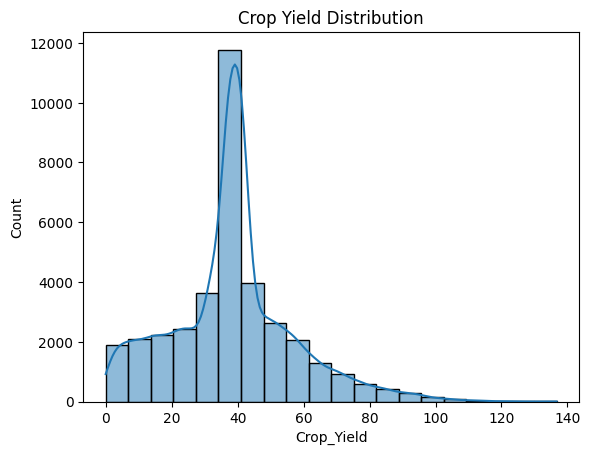

In [24]:
# Crop Yield distribution
sns.histplot(df_weather['Crop_Yield'], kde=True, bins=20)
plt.title("Crop Yield Distribution")
plt.show()

Text(0, 0.5, 'Average Crop Yield')

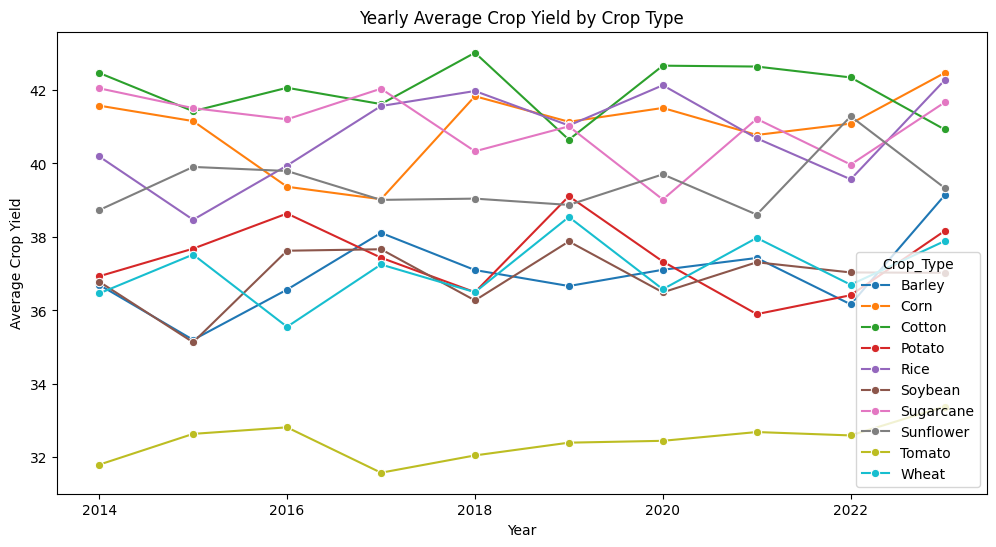

In [25]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a line chart showing average crop yield per year by crop type
sns.lineplot(data=grouped, x='Year', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Yearly Average Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Average Crop Yield")

C:\Users\james\AppData\Local\Temp\ipykernel_13908\1152867826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')


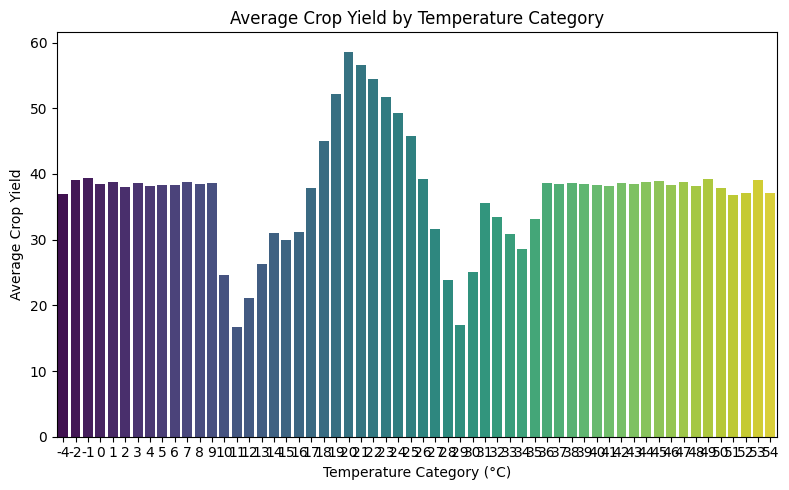

In [34]:
# Calculate mean Crop_Yield per temperature category
grouped = df_weather.groupby('Temperature')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

In [30]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df_weather['Temp_Category'] = pd.cut(df_weather['Temperature'], bins=bins, labels=labels, include_lowest=True)

print(df_weather[['Temperature', 'Temp_Category']].head())

   Temperature Temp_Category
0            9           Low
1           20        Medium
2           12        Medium
3           20        Medium
4           16        Medium


C:\Users\james\AppData\Local\Temp\ipykernel_13908\3698691058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_weather.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()
C:\Users\james\AppData\Local\Temp\ipykernel_13908\3698691058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')


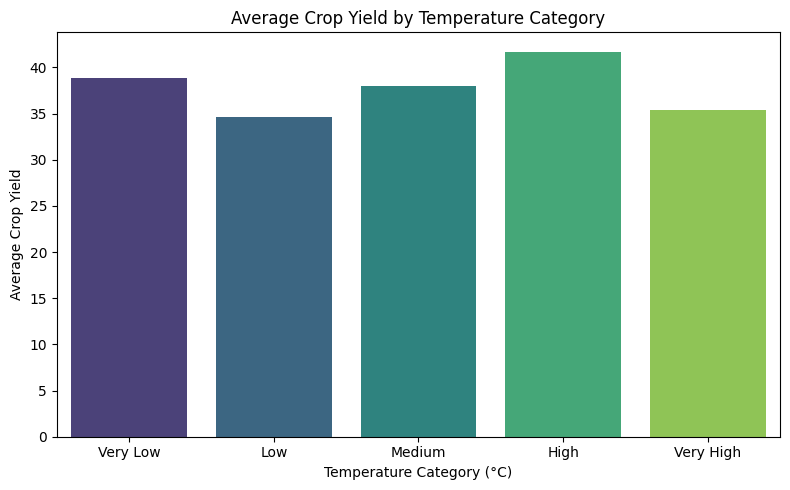

In [35]:
# Calculate mean Crop_Yield per temperature category
grouped = df_weather.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

In [28]:
# Temperature
# Group by Crop_Type and calculate mean Temperature and Crop_Yield
grouped = df_weather.groupby('Crop_Type')[['Temperature', 'Crop_Yield']].mean().reset_index()
print(grouped)

   Crop_Type  Temperature  Crop_Yield
0     Barley    23.815444   37.016657
1       Corn    23.754655   40.991761
2     Cotton    23.763691   41.979618
3     Potato    23.943319   37.409590
4       Rice    23.776013   40.782177
5    Soybean    23.765882   36.921574
6  Sugarcane    23.812705   40.999078
7  Sunflower    23.816539   39.428570
8     Tomato    23.901424   32.441294
9      Wheat    23.765608   37.095684


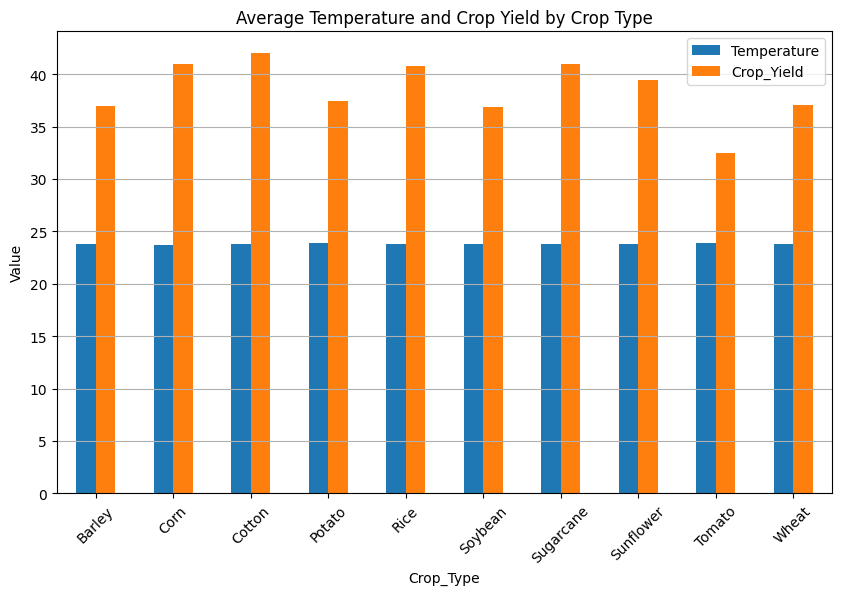

In [28]:
# Bar plot for average Temperature and Crop_Yield
grouped.plot(x='Crop_Type', y=['Temperature', 'Crop_Yield'], kind='bar', figsize=(10,6))
plt.title("Average Temperature and Crop Yield by Crop Type")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

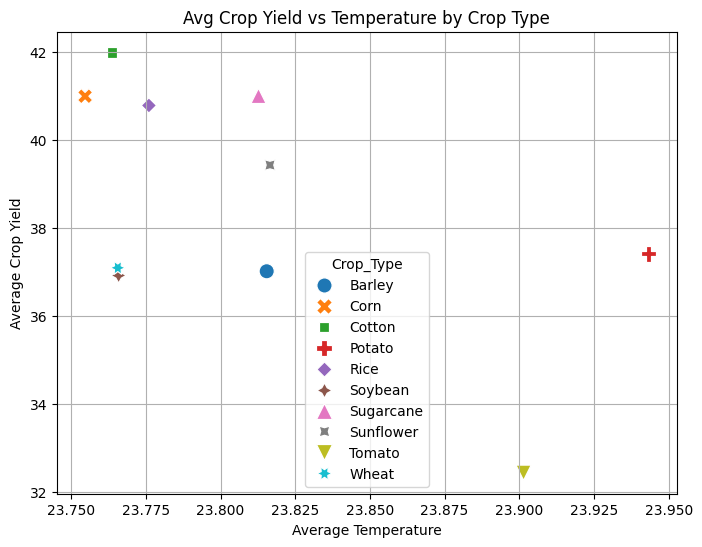

In [29]:
# Set figure size
plt.figure(figsize=(8,6))

# Scatter plot with different colors and markers by Crop_Type
sns.scatterplot(
    data=grouped,
    x='Temperature',
    y='Crop_Yield',
    hue='Crop_Type',      # Different colors by crop
    style='Crop_Type',    # Different marker shapes by crop
    s=120                 # Marker size
)

# Add chart title and labels
plt.title("Avg Crop Yield vs Temperature by Crop Type")
plt.xlabel("Average Temperature")
plt.ylabel("Average Crop Yield")

# Add grid
plt.grid(True)

# Show plot
plt.show()

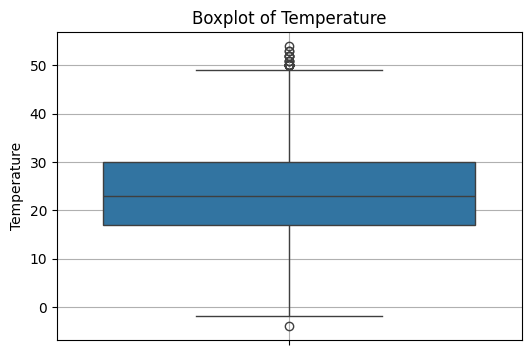

In [31]:
# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df_weather['Temperature'])

# Set title
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot
plt.show()

In [32]:
# Remove outliers from the 'Temperature' column using the IQR method
Q1 = df_weather['Temperature'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_weather['Temperature'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

print(Q1)
print(Q3)

17.0
30.0


In [36]:
# Filter out values outside the acceptable range (Q1 - 1.5*IQR to Q3 + 1.5*IQR)
df_weather = df_weather[(df_weather['Temperature'] >= Q1 - 1.5 * IQR) & (df_weather['Temperature'] <= Q3 + 1.5 * IQR)]
print(df_weather)
print("Outliers removed from 'Temperature' using IQR method")

             Date  Crop_Type  Temperature  Humidity  Wind_Speed  Crop_Yield  \
0      2014-01-01      Wheat            9        80          11   37.095684   
1      2014-01-01       Corn           20        80           9  104.871310   
2      2014-01-01       Rice           12        80           7   40.782177   
3      2014-01-01     Barley           20        80           3   58.939796   
4      2014-01-01    Soybean           16        80           8   32.970413   
...           ...        ...          ...       ...         ...         ...   
36515  2023-12-31     Cotton           20        80           4   73.323885   
36516  2023-12-31  Sugarcane           21        79           9   39.226521   
36517  2023-12-31     Tomato            6        80           9   32.441294   
36518  2023-12-31     Potato           11        80          11    6.067881   
36519  2023-12-31  Sunflower           11        80           5   11.825986   

       Year  Month  Day Temp_Category  
0      2014

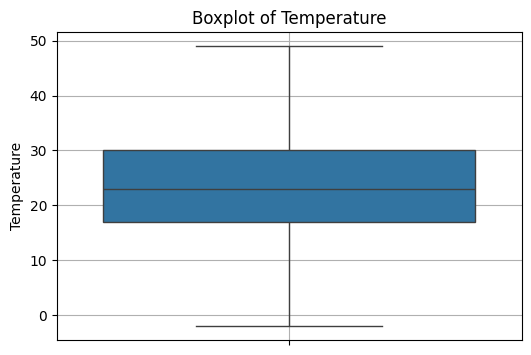

In [68]:
# Set plot size
plt.figure(figsize=(6, 4))

# Draw boxplot for 'Temperature'
sns.boxplot(y=df_weather['Temperature'])

# Set title
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot
plt.show()

In [38]:
# Temp_Category
# Group by Crop_Type and Temp_Category, then calculate mean Crop_Yield
grouped = df_weather.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type Temp_Category  Crop_Yield
0    Barley      Very Low   37.016657
1    Barley           Low   32.668408
2    Barley        Medium   40.367406
3    Barley          High   34.644705
4    Barley     Very High   37.016657


C:\Users\james\AppData\Local\Temp\ipykernel_28080\4197248664.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_weather.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()


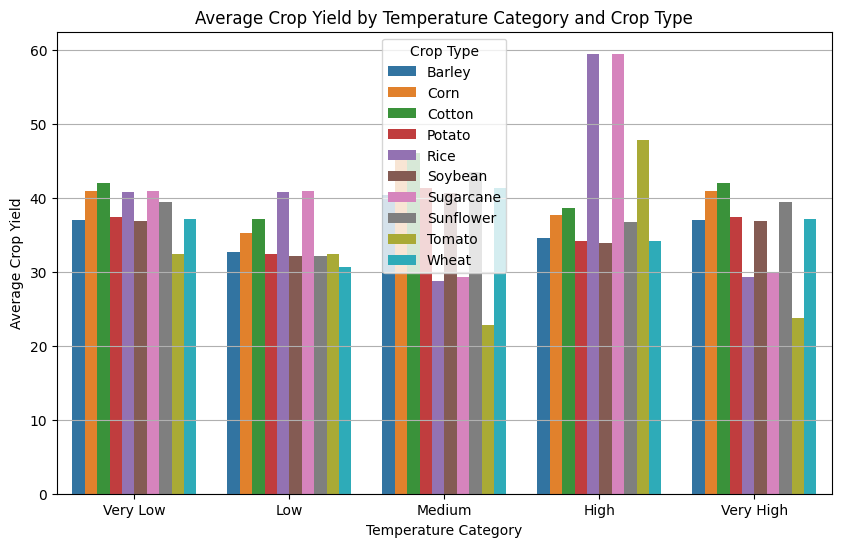

In [40]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a bar plot
# x-axis: Temperature Category (Low, Medium, High, etc.)
# y-axis: Average Crop Yield
# hue: Different colors for each Crop_Type
sns.barplot(
    data=grouped,
    x='Temp_Category',
    y='Crop_Yield',
    hue='Crop_Type'
)

# Add title to the chart
plt.title("Average Crop Yield by Temperature Category and Crop Type")
plt.xlabel("Temperature Category")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.grid(axis='y')
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_28080\4136935032.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_weather.groupby(['Crop_Type','Temp_Category'])['Crop_Yield'].mean().reset_index()


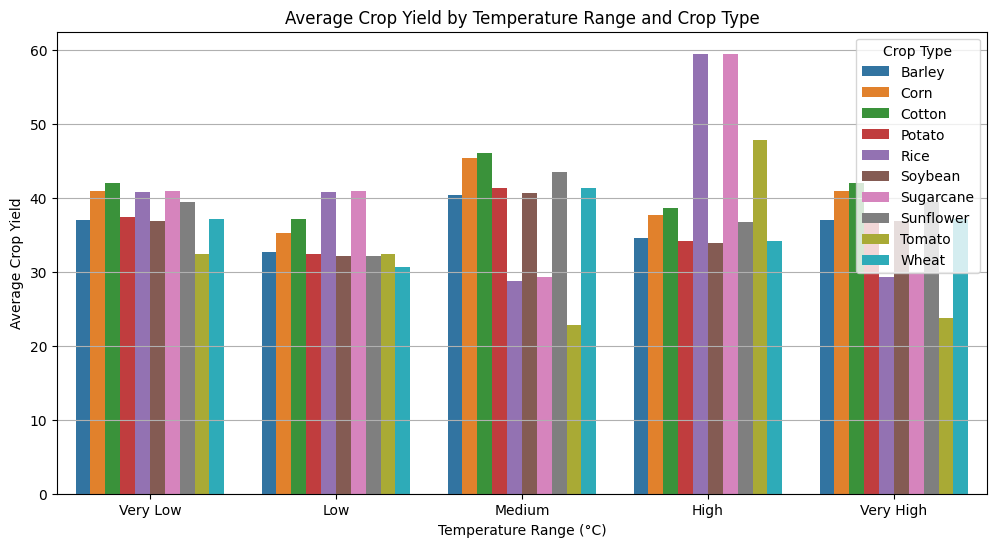

In [44]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df_weather['Temp_Category'] = pd.cut(df_weather['Temperature'], bins=bins, labels=labels, include_lowest=True)

# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df_weather.groupby(['Crop_Type','Temp_Category'])['Crop_Yield'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped,
    x='Temp_Category',
    y='Crop_Yield',
    hue='Crop_Type'
)

plt.title("Average Crop Yield by Temperature Range and Crop Type")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.grid(axis='y')
plt.show()

Numeric variable analysis

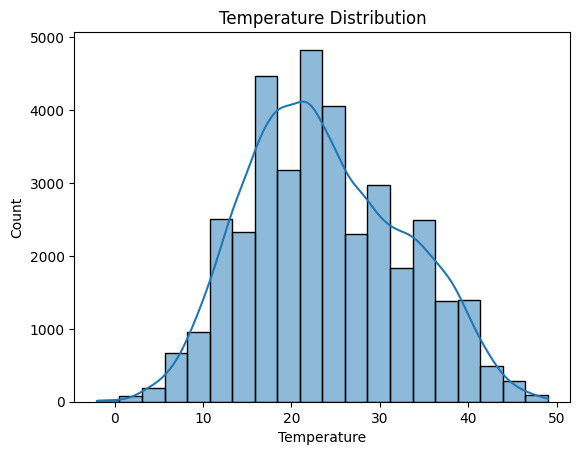

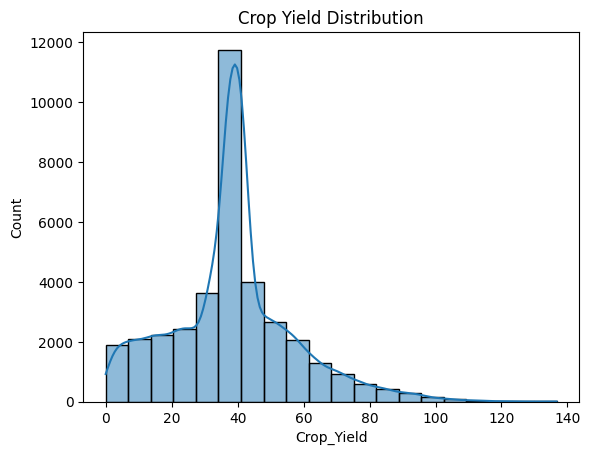

In [47]:
# Histogram: Show the distribution of Temperature values
# bins=20 → split into 20 intervals / kde=True → add KDE curve
sns.histplot(df_weather['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.show()

# Histogram: Show the distribution of Crop_Yield values
# bins=20 → split into 20 intervals / kde=True → add KDE curve
sns.histplot(df_weather['Crop_Yield'], bins=20, kde=True)
plt.title("Crop Yield Distribution")
plt.show()

Crop_Type
Sunflower    3652
Potato       3652
Cotton       3651
Corn         3651
Rice         3650
Tomato       3649
Sugarcane    3649
Soybean      3649
Barley       3648
Wheat        3646
Name: count, dtype: int64


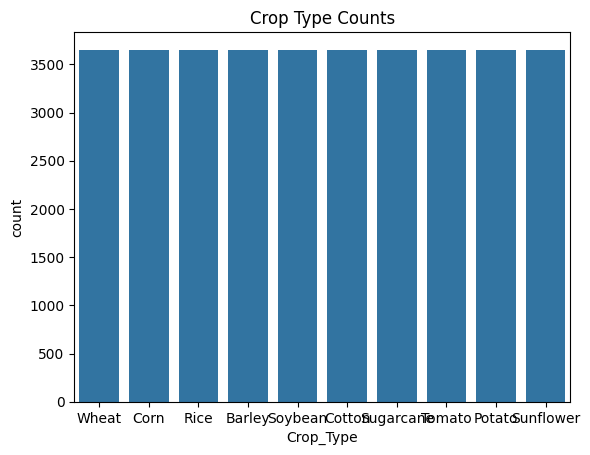

In [48]:
# Print the number of records for each Crop_Type
print(df_weather['Crop_Type'].value_counts())

# Visualize the counts of each Crop_Type using a bar chart
sns.countplot(data=df_weather, x='Crop_Type')
plt.title("Crop Type Counts")
plt.show()

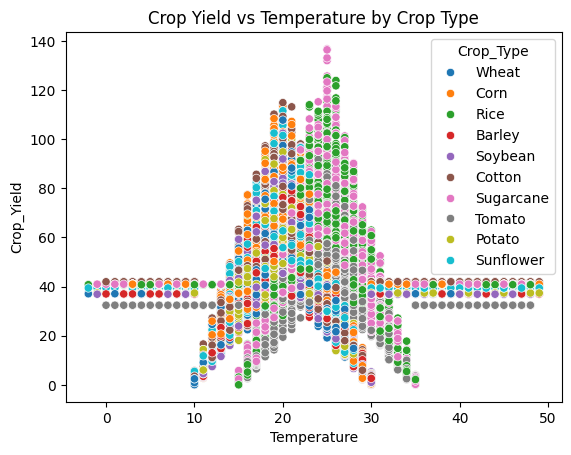

In [49]:
# Bivariate Analysis (Relationship between two variables)
# Scatter plot: Temperature vs Crop Yield by Crop Type
sns.scatterplot(data=df_weather, x='Temperature', y='Crop_Yield', hue='Crop_Type')
plt.title("Crop Yield vs Temperature by Crop Type")
plt.show()

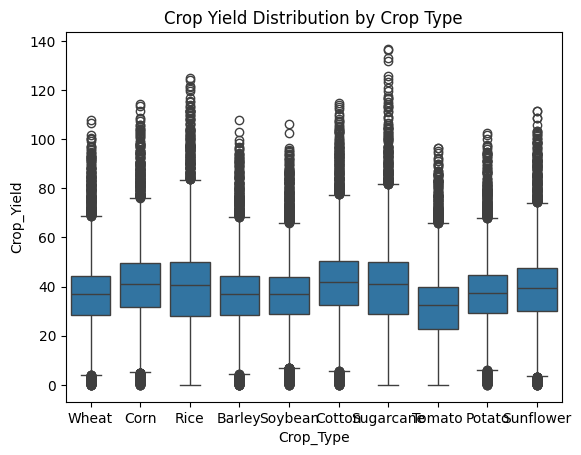

In [50]:
# Box plot: Crop Yield distribution per Crop Type
sns.boxplot(data=df_weather, x='Crop_Type', y='Crop_Yield')
plt.title("Crop Yield Distribution by Crop Type")
plt.show()


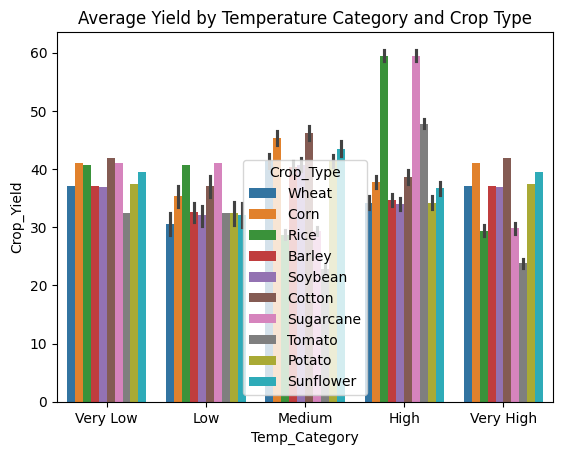

In [51]:
# Bar plot: Average Yield by Temperature Category and Crop Type
sns.barplot(data=df_weather, x='Temp_Category', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Yield by Temperature Category and Crop Type")
plt.show()

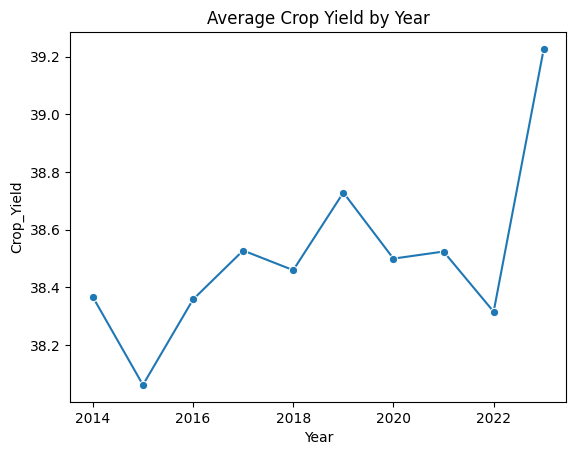

In [52]:
# 4. Time-series Analysis
# Average yearly yield
yearly_yield = df_weather.groupby('Year')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Year")
plt.show()

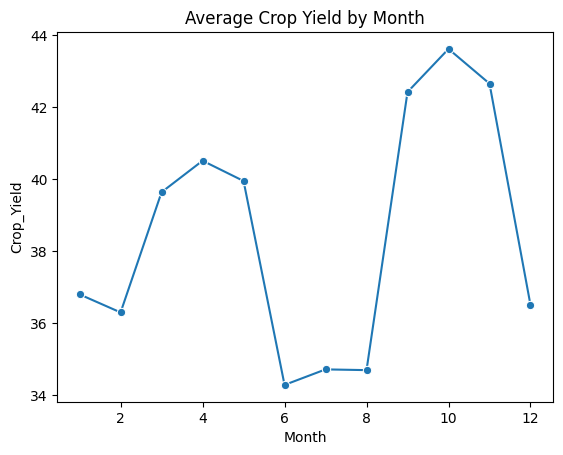

In [53]:
# Average monthly yield
monthly_yield = df_weather.groupby('Month')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=monthly_yield, x='Month', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Month")
plt.show()


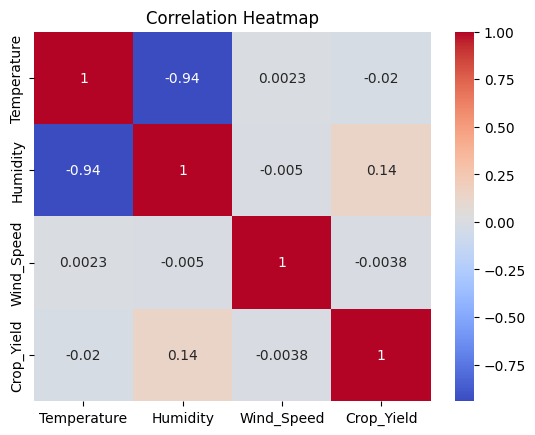

In [54]:
# 5. Correlation Analysis
# Correlation heatmap for numerical features
corr = df_weather[['Temperature','Humidity','Wind_Speed','Crop_Yield']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

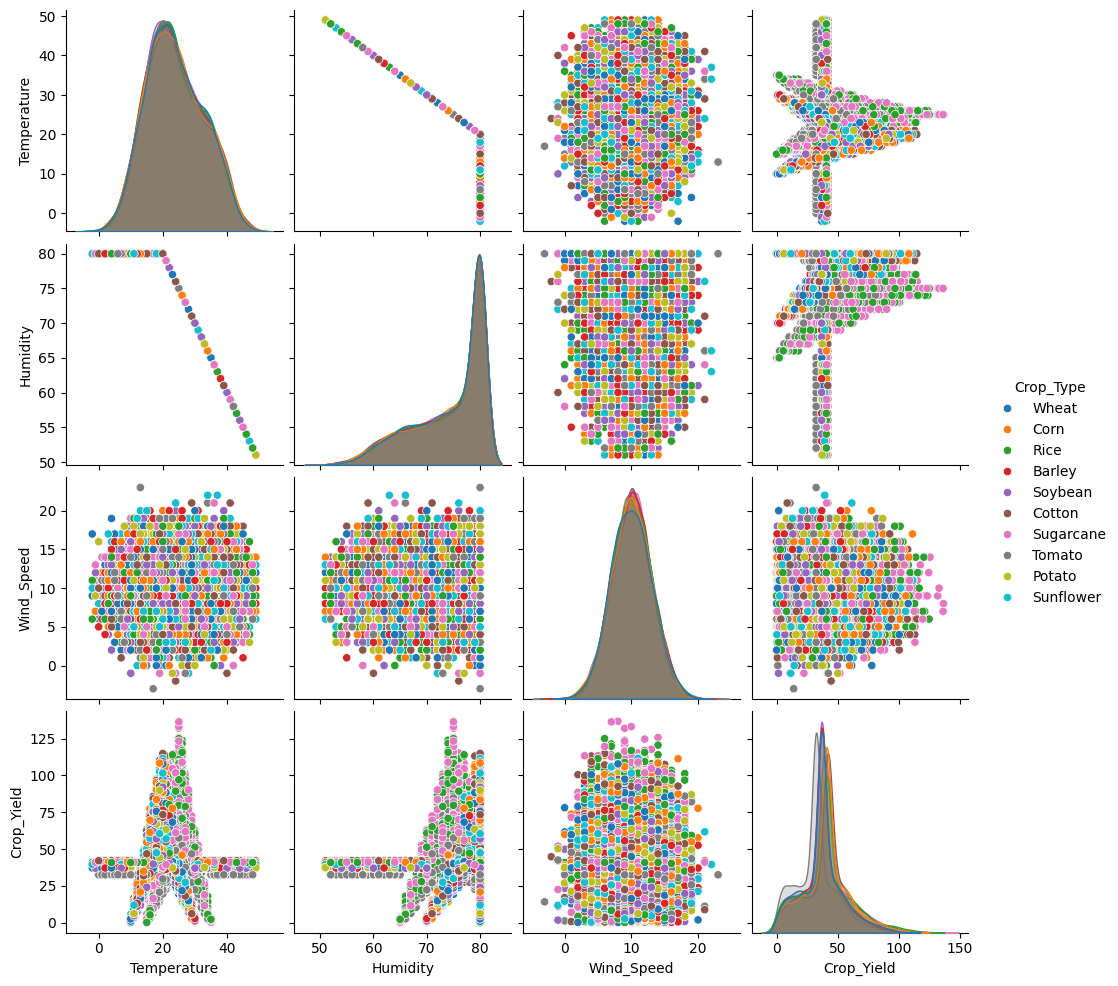

In [ ]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df_weather[['Temperature','Humidity','Wind_Speed','Crop_Yield','Crop_Type']], hue='Crop_Type')
plt.show()

🖼️ 그림 해석
1. 대각선 부분 (Diagonal Plots)
각 변수의 분포 (Histogram + KDE) 가 표시됨.
Temperature: 약 10~25도 구간이 가장 많음 → 정상적인 온도 분포
Humidity: 60~80% 부근에 밀집 → 특정 값에 집중된 경향
Wind_Speed: 정규분포에 가까움 (평균 근처에 몰려 있음)
Crop_Yield: 0 근처와 30~60, 일부 100 이상 값 → 이상치 의심 가능

2. 비대각선 부분 (Scatter Plots)
변수 간 상관관계를 색깔별로 표시 (Crop_Type별 색상)
Temperature vs Crop_Yield
→ 특정 온도 구간(10~25도)에서 수확량이 몰려 있음
→ 극단적으로 높은 수확량(>120)은 이상치일 가능성
Humidity vs Crop_Yield
→ 습도가 높을수록 일부 작물에서 수확량이 급증 (특이 패턴 존재)
→ 그러나 0 근처 값들이 많아 noise(노이즈)도 많음
Wind_Speed vs Crop_Yield
→ 뚜렷한 관계 없음 (고르게 분포)
→ 즉, 바람이 Crop Yield와 큰 직접적 영향은 없는 듯
Temperature vs Humidity
→ 선형 패턴(대각선 라인) → 데이터 수집 특성상 특정 조합으로 기록된 듯
→ 자연스러운 관계라기보다 데이터 생성 로직에서 생긴 구조적 패턴으로 보임
3. 전반적인 인사이트

데이터는 전반적으로 다양한 작물(Crop_Type) 별로 골고루 분포
하지만 Crop_Yield에서 이상치(outlier) 가 눈에 띔
0 값이 많음 (실제 실패 or 결측 대체?)
100 이상 값이 적지만 존재 (극단적 수치 → 제거 or 별도 처리 필요)

✅ 정리:

이 Pairplot은 데이터셋에서 변수 간 관계와 이상치 후보를 탐색하는 데 유용합니다.
특히 Crop_Yield의 분포가 비정상적으로 꼬리가 길고, 0 값이 많이 존재하는 점은 향후 이상치 처리(outlier handling) 과정에서 중요한 고려 사항입니다.

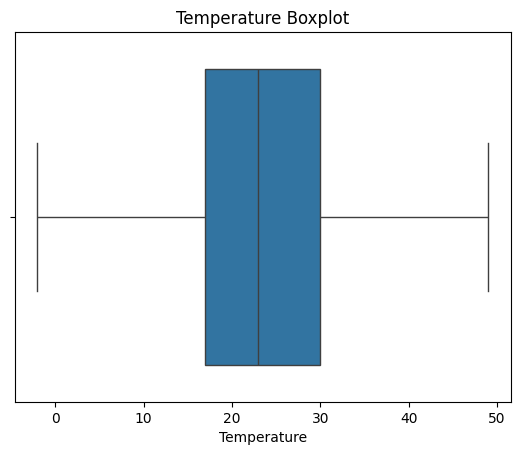

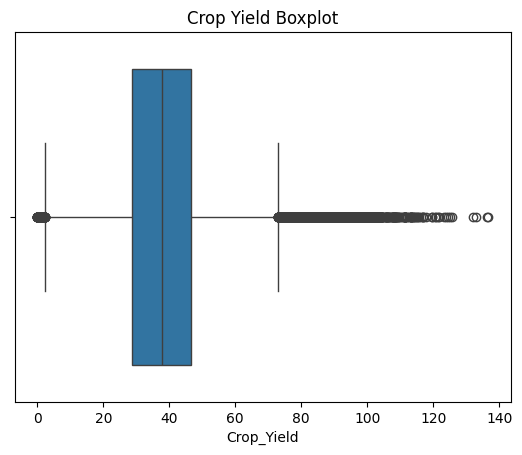

In [58]:
# Outlier Detection using Boxplot 
# Plot a boxplot for Temperature 
sns.boxplot(data=df_weather, x='Temperature')
plt.title("Temperature Boxplot")   
plt.show()                         

# Plot a boxplot for Crop_Yield 
sns.boxplot(data=df_weather, x='Crop_Yield')
plt.title("Crop Yield Boxplot")    
plt.show()            

In [63]:
# Outlier Detection using IQR 

def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)   # 1st Quartile (Q1, 25%)
    Q3 = data[column].quantile(0.75)   # 3rd Quartile (Q3, 75%)
    IQR = Q3 - Q1                      # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR       # Lower threshold 
    upper_bound = Q3 + 1.5 * IQR       # Upper threshold 

    # Find outliers / 이상치 추출
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f" - Q1 (25%): {Q1}")
    print(f" - Q3 (75%): {Q3}")
    print(f" - IQR: {IQR}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Outlier count: {len(outliers)} 개\n")

    return outliers


# Apply the function to Temperature and Crop_Yield
outliers_temp = detect_outliers_iqr(df_weather, 'Temperature')
outliers_yield = detect_outliers_iqr(df_weather, 'Crop_Yield')

Column: Temperature
 - Q1 (25%): 17.0
 - Q3 (75%): 30.0
 - IQR: 13.0
 - Lower Bound: -2.5
 - Upper Bound: 49.5
 - Outlier count: 0 개

Column: Crop_Yield
 - Q1 (25%): 28.725932648918235
 - Q3 (75%): 46.426922669420776
 - IQR: 17.70099002050254
 - Lower Bound: 2.1744476181644252
 - Upper Bound: 72.97840770017459
 - Outlier count: 2368 개



In [65]:
# Remove Outliers
# Keep only rows within the IQR range
df_weather_cleaned = df_weather[
    (df_weather['Crop_Yield'] >= 2.1744476181644252) & 
    (df_weather['Crop_Yield'] <= 72.97840770017459)
]

print("After removing outliers:")
print(" - Original count:", len(df_weather))
print(" - Cleaned count:", len(df_weather_cleaned))
print(" - Removed:", len(df_weather) - len(df_weather_cleaned))

After removing outliers:
 - Original count: 36497
 - Cleaned count: 34129
 - Removed: 2368


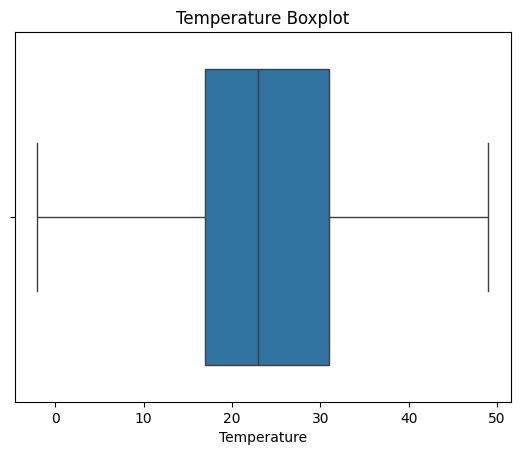

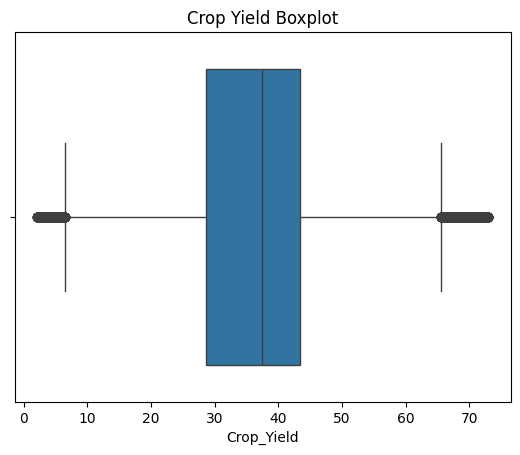

In [67]:
# Outlier Detection using Boxplot 
# Plot a boxplot for Temperature 
sns.boxplot(data=df_weather_cleaned, x='Temperature')
plt.title("Temperature Boxplot")   
plt.show()                         

# Plot a boxplot for Crop_Yield 
sns.boxplot(data=df_weather_cleaned, x='Crop_Yield')
plt.title("Crop Yield Boxplot")    
plt.show()     

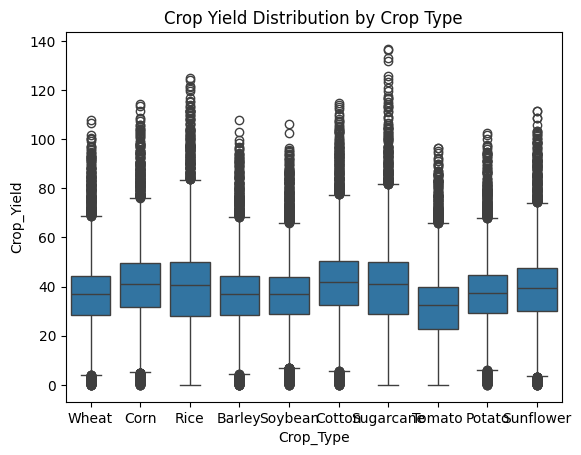

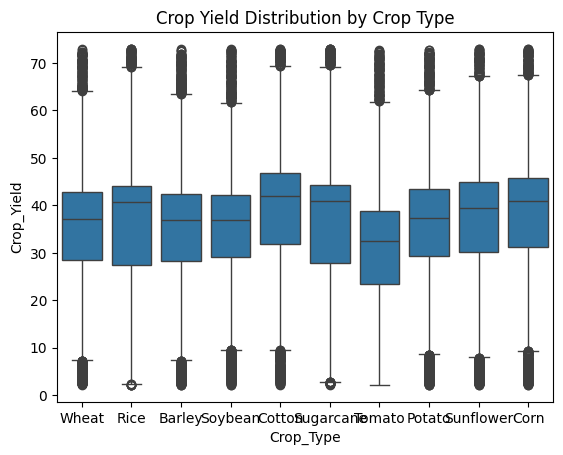

In [70]:
# Box plot: Crop Yield distribution per Crop Type
sns.boxplot(data=df_weather, x='Crop_Type', y='Crop_Yield')
plt.title("Crop Yield Distribution by Crop Type")
plt.show()

# Box plot: Crop Yield distribution per Crop Type
sns.boxplot(data=df_weather_cleaned, x='Crop_Type', y='Crop_Yield')
plt.title("Crop Yield Distribution by Crop Type")
plt.show()